**Analysing the HAM1000 data**



preprocess the images and train the model




In [1]:
# importing the libraries
import pandas as pd
import os
import glob
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow. keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
from pathlib import Path


In [2]:
# read the meta data csv file
data = pd.read_csv('/content/drive/MyDrive/Neural_Computing/HAM10000_metadata.csv')

In [3]:
# Initial analysis of the data, display 5 rows od data
print(data.head(5))

     lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

        dataset  
0  vidir_modern  
1  vidir_modern  
2  vidir_modern  
3  vidir_modern  
4  vidir_modern  


## **Analyzing the data by considering the unique values**

Checking individual columns based on its unique count



In [4]:
# display the available columns
print('Available columns : \n\n',data.columns)

Available columns : 

 Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization',
       'dataset'],
      dtype='object')


In [5]:
# checking unique images
print('Unique image IDs : ',data['image_id'].unique())
print('\nNumber of unique images : ',len(data['image_id'].unique()))

Unique image IDs :  ['ISIC_0027419' 'ISIC_0025030' 'ISIC_0026769' ... 'ISIC_0033536'
 'ISIC_0032854' 'ISIC_0032258']

Number of unique images :  10015


In [6]:
# checking unique dx
print('Unique dx : ',data['dx'].unique())
print('\nNumber of unique dx : ',len(data['dx'].unique()))

Unique dx :  ['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec']

Number of unique dx :  7


In [7]:
# checking unique dx_type
print('Unique dx_type : ',data['dx_type'].unique())
print('\nNumber of unique dx_type : ',len(data['dx_type'].unique()))

Unique dx_type :  ['histo' 'consensus' 'confocal' 'follow_up']

Number of unique dx_type :  4


In [8]:
# checking unique age
print('Unique age :',data['age'].unique())
print('\nNumber of unique ages : ',len(data['age'].unique()))

Unique age : [80. 75. 60. 70. 55. 85. 65. 40. 50. 45. 35.  0. 30. nan  5. 25. 20. 10.
 15.]

Number of unique ages :  19


In [9]:
# checking unique sex
print('Unique gender : ',data['sex'].unique())
print('\nNumber of unique genders : ',len(data['sex'].unique()))

Unique gender :  ['male' 'female' 'unknown']

Number of unique genders :  3


In [10]:
# checking unique localization
print('Unique localization : ',data['localization'].unique())
print('\nNumber of unique localization : ',len(data['localization'].unique()))

Unique localization :  ['scalp' 'ear' 'face' 'back' 'trunk' 'chest' 'upper extremity' 'abdomen'
 'unknown' 'lower extremity' 'genital' 'neck' 'hand' 'foot' 'acral']

Number of unique localization :  15


In [11]:
# checking unique dataset
print('Unique dataset : ',data['dataset'].unique())
print('\nNumber of unique datasets : ',len(data['dataset'].unique()))

Unique dataset :  ['vidir_modern' 'rosendahl' 'vienna_dias' 'vidir_molemax']

Number of unique datasets :  4


## **Analyzing the data by considering unique values and how many times it repeated**

In [12]:
print('Unique lesion_id and its count :\n\n',data['lesion_id'].value_counts())

Unique lesion_id and its count :

 HAM_0003789    6
HAM_0000835    6
HAM_0005263    6
HAM_0001863    6
HAM_0007427    5
              ..
HAM_0006000    1
HAM_0002762    1
HAM_0006894    1
HAM_0007132    1
HAM_0003347    1
Name: lesion_id, Length: 7470, dtype: int64


In [13]:
print('Unique image_id and its count :\n\n',data['image_id'].value_counts())

Unique image_id and its count :

 ISIC_0027419    1
ISIC_0030646    1
ISIC_0030164    1
ISIC_0032069    1
ISIC_0029007    1
               ..
ISIC_0028768    1
ISIC_0026383    1
ISIC_0025794    1
ISIC_0028888    1
ISIC_0032258    1
Name: image_id, Length: 10015, dtype: int64


In [14]:
print('Unique dx and its count :\n\n',data['dx'].value_counts())

Unique dx and its count :

 nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64


In [15]:
print('Unique dx_type and its count :\n\n',data['dx_type'].value_counts())

Unique dx_type and its count :

 histo        5340
follow_up    3704
consensus     902
confocal       69
Name: dx_type, dtype: int64


In [16]:
print('Unique age and its count :\n\n',data['age'].value_counts())

Unique age and its count :

 45.0    1299
50.0    1187
55.0    1009
40.0     985
60.0     803
70.0     756
35.0     753
65.0     731
75.0     618
30.0     464
80.0     404
85.0     290
25.0     247
20.0     169
5.0       86
15.0      77
10.0      41
0.0       39
Name: age, dtype: int64


In [17]:
print('Unique sex and its count :\n\n',data['sex'].value_counts())

Unique sex and its count :

 male       5406
female     4552
unknown      57
Name: sex, dtype: int64


In [18]:
print('Unique localization and its count :\n\n',data['localization'].value_counts())

Unique localization and its count :

 back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: localization, dtype: int64


In [19]:
print('Unique dataset and its count :\n\n',data['dataset'].value_counts())

Unique dataset and its count :

 vidir_molemax    3954
vidir_modern     3363
rosendahl        2259
vienna_dias       439
Name: dataset, dtype: int64


Read the training data and extract the contents, add the path of each image based on the image name

In [20]:
# read the train data and convert into array format
data_dir = "/content/drive/MyDrive/Neural_Computing/input_data/"
  # set the list of image folder
categories = ["dataset 1","dataset 2"]
  # analyze the images
for item_ in categories:
  # assigning the location of the images to a variable 
    path = os.path.join(data_dir, item_)  

    # iterate over each images, considering all the age groups
    for img in os.listdir(path):  
      # read one by one image
        # print(path+"/"+img)
        # collecting name of the image 
        image_location = path+"/"+img
        # collect the image array
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)  # convert to array
        print('.............',img_array)
        data['path'] = data['image_id'].map(image_location.format)
        
        # data['image_array'] = data['image_id'].map(img_array)
        # plot the image
        # plt.imshow(img_array, cmap='gray')  
        # plt.show()  # displays the last image!
        break  # executing one at a time
    break  #break the for loop 
# checking the array shape
print(img_array.shape) #(128, 128)
print(data.head(5))

............. [[180 179 179 ... 185 187 187]
 [180 180 180 ... 185 186 186]
 [178 178 179 ... 188 188 188]
 ...
 [174 173 175 ... 198 198 198]
 [175 173 174 ... 199 200 201]
 [175 176 175 ... 199 198 198]]
(450, 600)
     lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

        dataset                                               path  
0  vidir_modern  /content/drive/MyDrive/Neural_Computing/input_...  
1  vidir_modern  /content/drive/MyDrive/Neural_Computing/input_...  
2  vidir_modern  /content/drive/MyDrive/Neural_Computing/input_...  
3  vidir_modern  /content/drive/MyDrive/Neural_Computing/input_...  
4  vidir_modern  

Image names are mapped to different groups,so checking list of available columns 

In [21]:
print(data.columns)

Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization',
       'dataset', 'path'],
      dtype='object')


mapping the list of diseases

In [22]:
types_of_skin_diseases = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Bening keratosis-like lesions',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

# mapping the skin diseases and converting it into numeric labels
data['disease_type'] = data['dx'].map(types_of_skin_diseases.get)
data['disease_type_class'] = pd.Categorical(data['disease_type']).codes

checking available data, whether properly the path is added to the variable or not

In [23]:
data.head(6)

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,path,disease_type,disease_type_class
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,/content/drive/MyDrive/Neural_Computing/input_...,Bening keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,/content/drive/MyDrive/Neural_Computing/input_...,Bening keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,/content/drive/MyDrive/Neural_Computing/input_...,Bening keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,/content/drive/MyDrive/Neural_Computing/input_...,Bening keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,/content/drive/MyDrive/Neural_Computing/input_...,Bening keratosis-like lesions,2
5,HAM_0001466,ISIC_0027850,bkl,histo,75.0,male,ear,vidir_modern,/content/drive/MyDrive/Neural_Computing/input_...,Bening keratosis-like lesions,2


In [24]:
# def preprocess_train_data():
# assigning the path and list of age categories
# set the path of the folder where the images stored
data_dir = "/content/drive/MyDrive/Neural_Computing/input_data/"
# set the list of age categories available in the folder
# categories = ["dataset 1","dataset 2"]
categories = ["dataset 1"]
# set an image size
IMG_SIZE = 50
#initialize new array to keep all the training data
training_data = []

# function to read all the images and extract the training images and corresponding classes
def generate_training_data():
  # iterate through all the age folder and through each image
    for item_ in categories:  
      # access the location to individual images based on the age group
        path = os.path.join(data_dir,item_) 
        # get the list of available classes based each age group 
        class_num = categories.index(item_)  
        
        # iterate over each image per age folder
        for img in (os.listdir(path)):  
            try:
                # read one by one images and convert it into the grayscale format, which is an array
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                # resize the image; means it helps to normalize data size
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                # adding the extracted trained data and corresponding classes to a list
                training_data.append([new_array, img])  
            # skip the errors, if there is any possibility to occur
            except Exception as e:  
                pass

generate_training_data()
#checking the total size of the training data
print(len(training_data))
# print(training_data)

#initialize an empty list to add the list of training features
feature = []
#initialize an empty list to add the list of training targets
image_name = []

# iterating through the set of training features and targets
for features,label in training_data:
    # extracted feature from the training_data will be added to the 'feature' variable
    feature.append(features)
    # extracted target from the training_data will be added to the 'target' variable
    image_name.append(label)

# print(feature)
# print(image_name)

5000


In [25]:
# checking the type of data
print(type(feature))
print(type(image_name))
# print(feature)
# print(image_name)

<class 'list'>
<class 'list'>


Extract name of the image by eliminating the extension

In [26]:
labels = pd.DataFrame(image_name)
labels.columns= ['image_id']
labels['image_id'] = labels['image_id'].str.replace('.jpg', '', regex=False)
print(labels)

          image_id
0     ISIC_0028303
1     ISIC_0028308
2     ISIC_0028299
3     ISIC_0028309
4     ISIC_0028319
...            ...
4995  ISIC_0025310
4996  ISIC_0025313
4997  ISIC_0025302
4998  ISIC_0025308
4999  ISIC_0025303

[5000 rows x 1 columns]


Checking whether the extension is removed from the name of the image or not

In [27]:
data['image_id']

0        ISIC_0027419
1        ISIC_0025030
2        ISIC_0026769
3        ISIC_0025661
4        ISIC_0031633
             ...     
10010    ISIC_0033084
10011    ISIC_0033550
10012    ISIC_0033536
10013    ISIC_0032854
10014    ISIC_0032258
Name: image_id, Length: 10015, dtype: object

combining the data based onthe image_id

In [28]:
print(labels.head(5))
print(len(labels))
print(data.head(5))
print(len(data))


required_data = pd.merge(labels,data, left_on='image_id', right_on='image_id', how='left')
required_data


       image_id
0  ISIC_0028303
1  ISIC_0028308
2  ISIC_0028299
3  ISIC_0028309
4  ISIC_0028319
5000
     lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

        dataset                                               path  \
0  vidir_modern  /content/drive/MyDrive/Neural_Computing/input_...   
1  vidir_modern  /content/drive/MyDrive/Neural_Computing/input_...   
2  vidir_modern  /content/drive/MyDrive/Neural_Computing/input_...   
3  vidir_modern  /content/drive/MyDrive/Neural_Computing/input_...   
4  vidir_modern  /content/drive/MyDrive/Neural_Computing/input_...   

                    disease_type  disease_type_class  
0 

,image_id,lesion_id,dx,dx_type,age,sex,localization,dataset,path,disease_type,disease_type_class
0,ISIC_0028303,HAM_0005030,bcc,histo,75.0,female,upper extremity,rosendahl,/content/drive/MyDrive/Neural_Computing/input_...,Basal cell carcinoma,1
1,ISIC_0028308,HAM_0003752,bkl,histo,50.0,female,chest,rosendahl,/content/drive/MyDrive/Neural_Computing/input_...,Bening keratosis-like lesions,2
2,ISIC_0028299,HAM_0001540,nv,follow_up,60.0,male,lower extremity,vidir_molemax,/content/drive/MyDrive/Neural_Computing/input_...,Melanocytic nevi,4
3,ISIC_0028309,HAM_0006770,bkl,consensus,70.0,female,back,vidir_modern,/content/drive/MyDrive/Neural_Computing/input_...,Bening keratosis-like lesions,2
4,ISIC_0028319,HAM_0001464,nv,follow_up,70.0,male,trunk,vidir_molemax,/content/drive/MyDrive/Neural_Computing/input_...,Melanocytic nevi,4
...,...,...,...,...,...,...,...,...,...,...,...
4995,ISIC_0025310,HAM_0005017,nv,histo,75.0,female,back,rosendahl,/content/drive/MyDrive/Neural_Computing/input_...,Melanocytic nevi,4
4996,ISIC_0025313,HAM_0001378,mel,histo,35.0,female,lower extremity,vienna_dias,/content/drive/MyDrive/Neural_Computing/input_...,Melanoma,5
4997,ISIC_0025302,HAM_0007421,df,histo,60.0,female,lower extremity,rosendahl,/content/drive/MyDrive/Neural_Computing/input_...,Dermatofibroma,3
4998,ISIC_0025308,HAM_0001821,nv,follow_up,40.0,male,trunk,vidir_molemax,/content/drive/MyDrive/Neural_Computing/input_...,Melanocytic nevi,4


## **Analyzing the data in detail**

Analyzing information of the data by checking the data types

In [29]:
required_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   image_id            5000 non-null   object 
 1   lesion_id           5000 non-null   object 
 2   dx                  5000 non-null   object 
 3   dx_type             5000 non-null   object 
 4   age                 4997 non-null   float64
 5   sex                 5000 non-null   object 
 6   localization        5000 non-null   object 
 7   dataset             5000 non-null   object 
 8   path                5000 non-null   object 
 9   disease_type        5000 non-null   object 
 10  disease_type_class  5000 non-null   int8   
dtypes: float64(1), int8(1), object(9)
memory usage: 434.6+ KB


Describe the available data

In [30]:
required_data.describe()

,age,disease_type_class
count,4997.000000,5000.000000
mean,51.996198,3.570200
std,16.807396,1.217115
min,0.000000,0.000000
25%,40.000000,4.000000
50%,50.000000,4.000000
75%,65.000000,4.000000
max,85.000000,6.000000


In [47]:
required_data['age'].fillna(0)

0       75.0
1       50.0
2       60.0
3       70.0
4       70.0
        ... 
4995    75.0
4996    35.0
4997    60.0
4998    40.0
4999    55.0
Name: age, Length: 5000, dtype: float64

## **Exploratory Data Analysis**

In [48]:
# checking the data
required_data.head(5)

,image_id,lesion_id,dx,dx_type,age,sex,localization,dataset,path,disease_type,disease_type_class
0,ISIC_0028303,HAM_0005030,bcc,histo,75.0,female,upper extremity,rosendahl,/content/drive/MyDrive/Neural_Computing/input_...,Basal cell carcinoma,1
1,ISIC_0028308,HAM_0003752,bkl,histo,50.0,female,chest,rosendahl,/content/drive/MyDrive/Neural_Computing/input_...,Bening keratosis-like lesions,2
2,ISIC_0028299,HAM_0001540,nv,follow_up,60.0,male,lower extremity,vidir_molemax,/content/drive/MyDrive/Neural_Computing/input_...,Melanocytic nevi,4
3,ISIC_0028309,HAM_0006770,bkl,consensus,70.0,female,back,vidir_modern,/content/drive/MyDrive/Neural_Computing/input_...,Bening keratosis-like lesions,2
4,ISIC_0028319,HAM_0001464,nv,follow_up,70.0,male,trunk,vidir_molemax,/content/drive/MyDrive/Neural_Computing/input_...,Melanocytic nevi,4


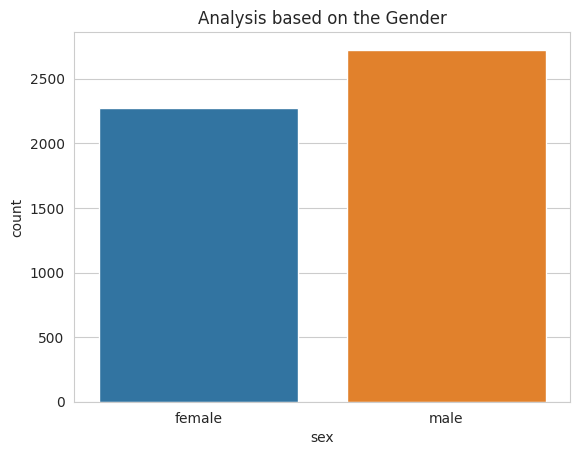

In [49]:
# Analyzing based on the gender
ax = sns.countplot(x = 'sex', data = required_data)
plt.title('Analysis based on the Gender')
plt.xticks()
plt.show()

analyzing count of the targets

In [50]:
required_data['disease_type_class'].value_counts()

4    3431
2     564
5     435
1     266
0     183
6      65
3      56
Name: disease_type_class, dtype: int64

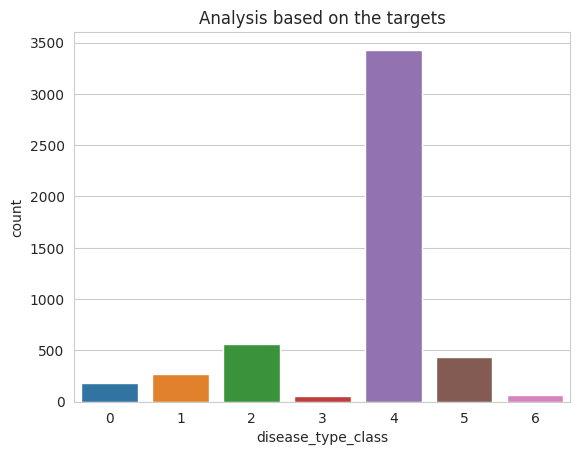

In [51]:
# Analyzing based on the targets
ax = sns.countplot(x = 'disease_type_class', data = required_data)
plt.title('Analysis based on the targets')
plt.xticks()
plt.show()

Analysis based on the cell type

In [52]:
required_data['disease_type'].value_counts()

Melanocytic nevi                 3431
Bening keratosis-like lesions     564
Melanoma                          435
Basal cell carcinoma              266
Actinic keratoses                 183
Vascular lesions                   65
Dermatofibroma                     56
Name: disease_type, dtype: int64

In [53]:
required_data.columns

Index(['image_id', 'lesion_id', 'dx', 'dx_type', 'age', 'sex', 'localization',
       'dataset', 'path', 'disease_type', 'disease_type_class'],
      dtype='object')

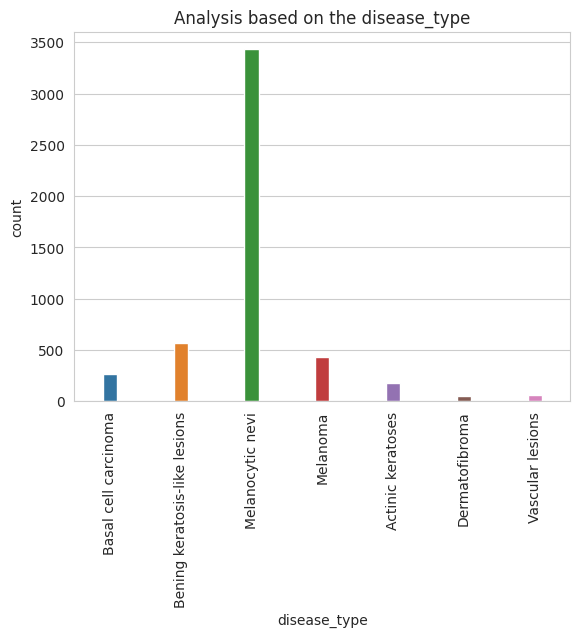

In [54]:
# Analyzing based on the disease_type
ax = sns.countplot(x = 'disease_type',width=0.2, data = required_data)
plt.title('Analysis based on the disease_type')
plt.xticks(rotation=90)
plt.show()

Analyze the gender based on cell type

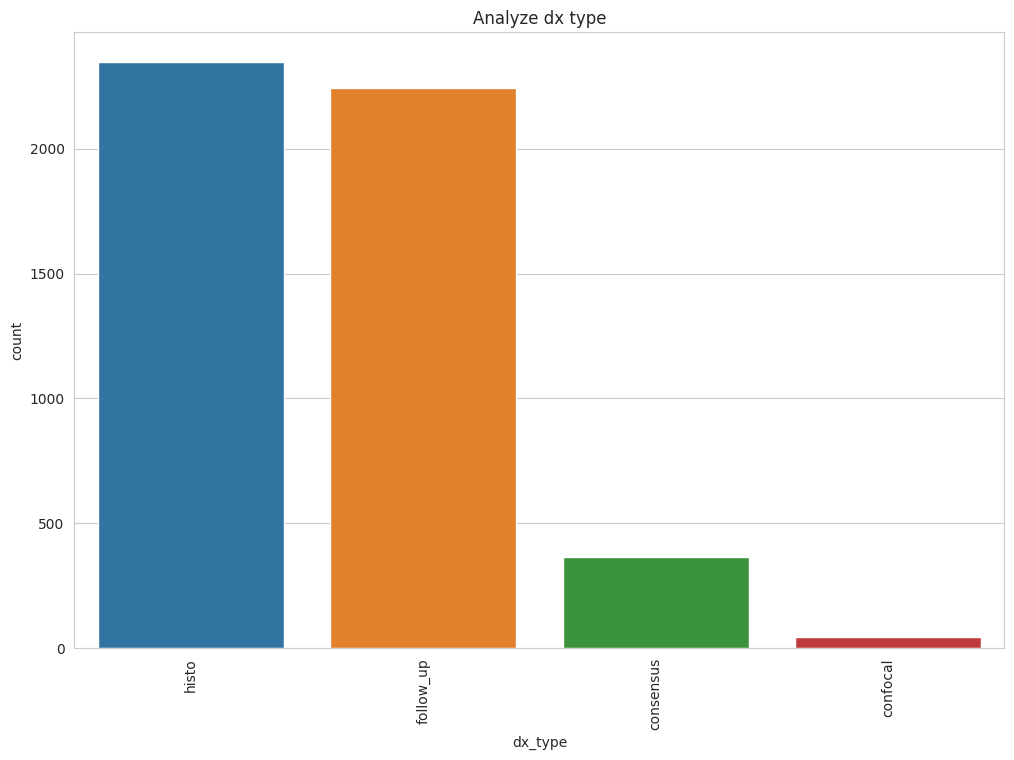

In [55]:
# Analyze dx type
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='dx_type', data=required_data)
plt.title('Analyze dx type')
plt.xticks(rotation=90)
plt.show()

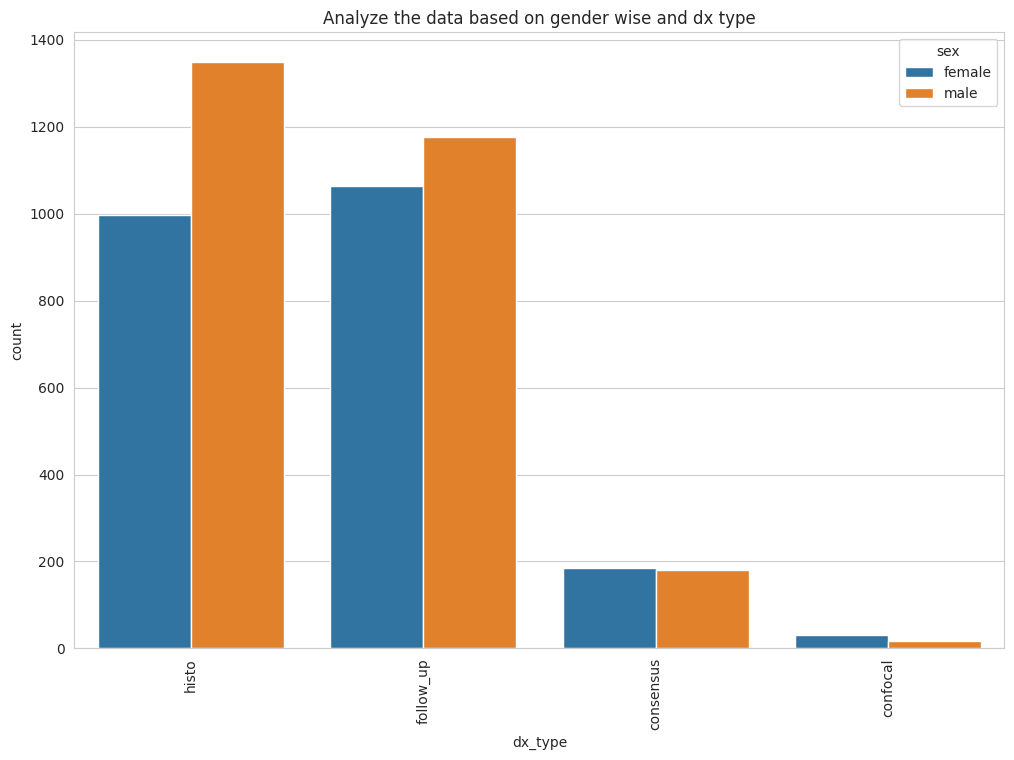

In [56]:
# Analyze the data based on gender wise and dx type
sns.set_style('whitegrid')
fig,ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='dx_type', hue = 'sex', data = required_data)
plt.title('Analyze the data based on gender wise and dx type')
plt.xticks(rotation=90)
plt.show()

Analyze the localization based on its count

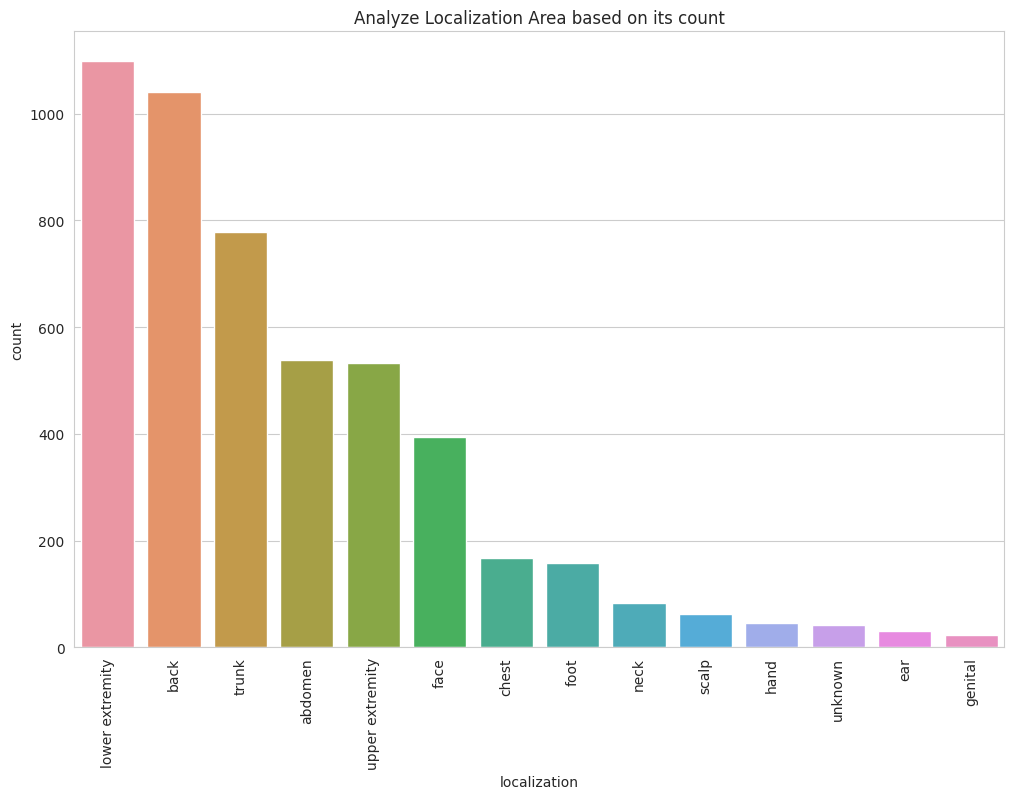

In [61]:
#Analyze Localization area
sns.set_style('whitegrid')
fig,axis = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='localization', data=required_data, order=required_data['localization'].value_counts().index)
plt.title('Analyze Localization Area based on its count')
plt.xticks(rotation=90)
plt.show()


Analyze the data based on gender and age

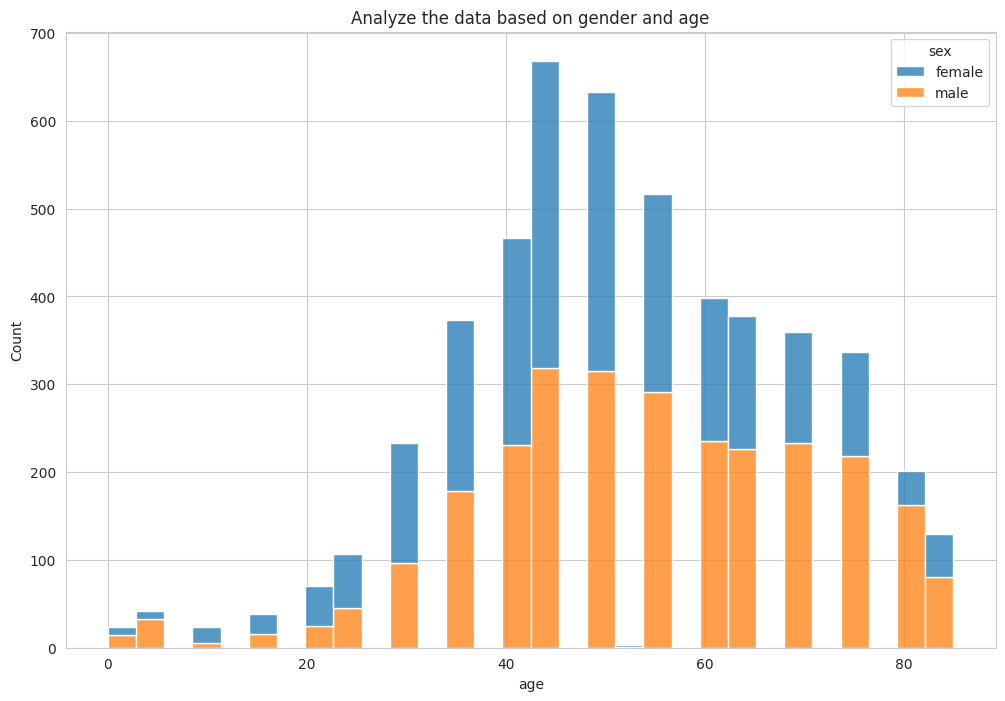

In [58]:
# Gender wise age distribution
sns.set_style('whitegrid')
fig, axes = plt.subplots(figsize=(12,8))
ax = sns.histplot(data=required_data, x = 'age', hue = 'sex', multiple='stack')
plt.title('Analyze the data based on gender and age')
plt.show()

Analyze the data based on gender and corresponding localization

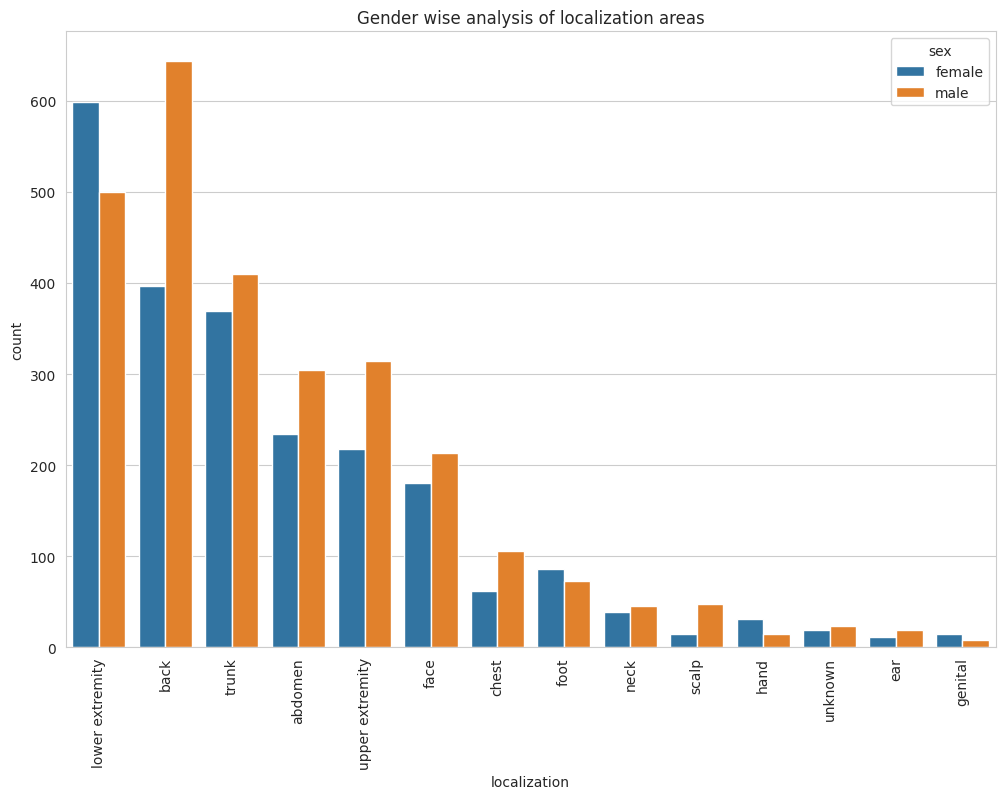

In [62]:
# Gender wise analysis of localization areas

fig,axes = plt.subplots(figsize=(12,8))
ax = sns.countplot(x = 'localization', hue = 'sex', data = required_data, order = required_data['localization'].value_counts().index)
plt.title('Gender wise analysis of localization areas')
plt.xticks(rotation=90)
plt.show()